In [1]:
import pandas as pd
from tqdm import tqdm
from top2vec import Top2Vec
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import zscore
from pathlib import Path
import yaml 
import os

from helpers.linkage import *
from helpers import dataloader
from helpers.afa import adaptive_filter
from helpers.visuals import add_cabinet_periods
from helpers import style as style
from bs4 import BeautifulSoup as bs

# Set Plot Style
style.load_style()

# Load Config
cf = yaml.safe_load(Path('config.yml').read_text())

/home/rb/.virtualenvs/phd_venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model_ks = list(range(50,301,25))

In [3]:
r = []
for k in model_ks:
    fn = '/home/rb/Documents/Data/case-studies/linkage/lda/diag-speech-bound-'+str(k)
    with open(fn,'r') as f:
        s = bs(f.read())

    diag = {k:float(v) for k,v in s.find('topic').attrs.items() if k != 'id'}
    diag.update({"k":k})
    r.append(diag)

/home/rb/.virtualenvs/phd_venv/lib/python3.10/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


FileNotFoundError: [Errno 2] No such file or directory: '/home/rb/Documents/Data/case-studies/linkage/lda/diag-speech-bound-275'

In [10]:
r = pd.DataFrame(r).set_index('k')

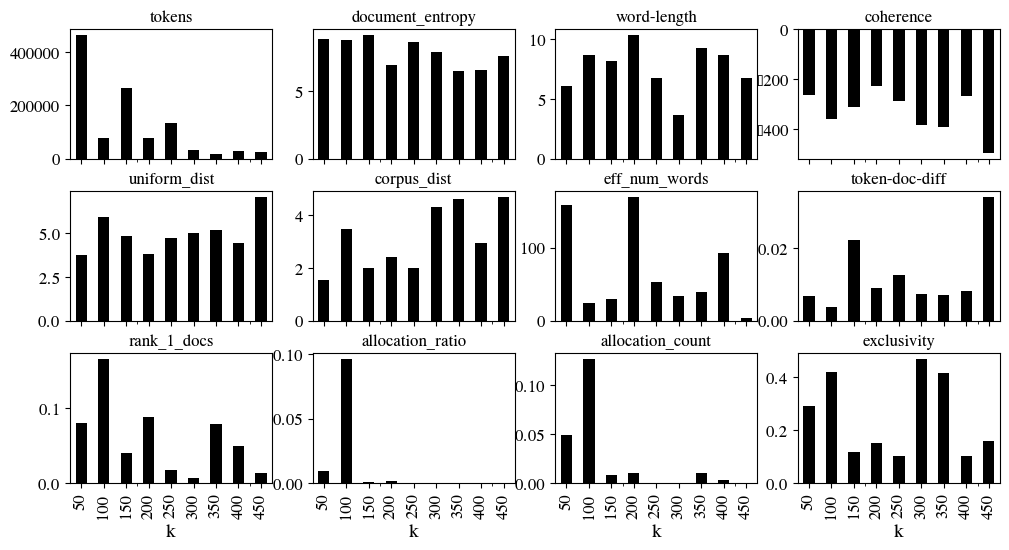

In [18]:
r.plot.bar(subplots=True,sharex=True, sharey=False, legend=False,layout=(4,4),figsize=(12,8),color='black')
plt.subplots_adjust(hspace=.25)

In [2]:
data = pd.read_csv(cf['data_path_speech'],sep='\t',usecols=['date','speech_id','role','member-ref','lemm_cleaned'])
data['date'] = pd.to_datetime(data.date,infer_datetime_format=True)

In [4]:
data['sp_l'] = data.lemm_cleaned.str.split(' ').str.len()
data['date_q'] = data.date.dt.to_period('Q').dt.to_timestamp()

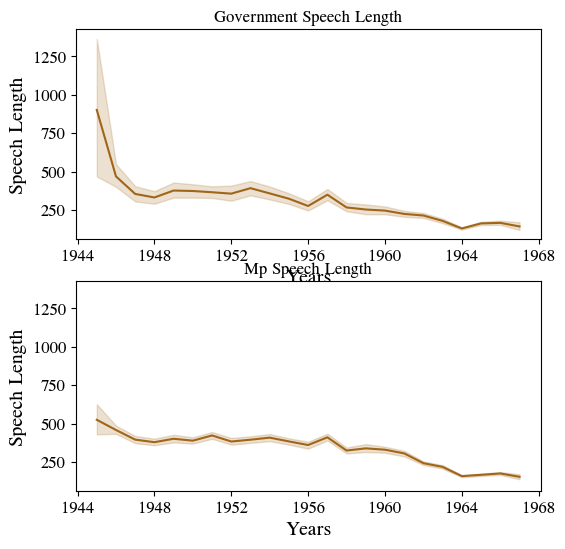

In [21]:
fig,ax = plt.subplots(2,1,figsize=(6,6),sharey=True)

for c, (g,d) in enumerate(data.groupby('role')):
    sns.lineplot(data=d,ax=ax[c],x='date_q',y='sp_l')
    ax[c].set_title(g.capitalize() + ' Speech Length')
    ax[c].set_ylabel('Speech Length')
    ax[c].set_xlabel('Years')

In [37]:
data2 = data[['date','sp_l']].groupby('date').sum().reset_index()
data2['date_q'] = data2.date.dt.to_period('Y').dt.to_timestamp()

<AxesSubplot: xlabel='date_q', ylabel='sp_l'>

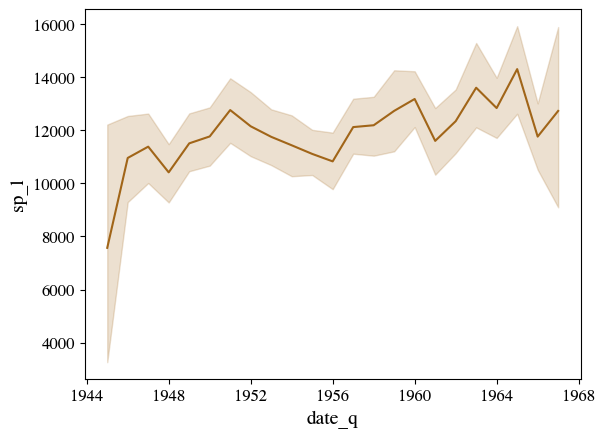

In [38]:
sns.lineplot(x='date_q',y='sp_l',data=data2)

In [34]:
data2

,date,sp_l,date_q
0,1945-11-20,230,1946-01-01
1,1945-11-22,104,1946-01-01
2,1945-12-13,4942,1946-01-01
3,1945-12-18,18463,1946-01-01
4,1945-12-19,7446,1946-01-01
...,...,...,...
1660,1967-01-16,13750,1946-10-01
1661,1967-01-17,13152,1946-10-01
1662,1967-01-18,19088,1946-10-01
1663,1967-01-19,5549,1946-10-01
